# Rock Vs Mine Prediction

There is war is going on between two countries submarine of the country is going under the water to another country and enemy country planted some mines in the oceans mine are nothing but explosive that explodes when some object comes in contact with it and there can be rocks in the ocean so submarine needs to predict whether it is crossing mine or  rock our job is to make a system that can predict whether the object beneath the submarine is a mine or a rock so how this is done is submarine uses sonar signal that sends sound and receives switchbacks so this signal in the processed to detect whether the object is a mine or it's just a rock in the ocean to predict the rock and mine we use some types of algorithms like decision tree, KNN, Logistic Regression, Random Forest and SVM 

In [296]:
# Import required librries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [297]:
# Lets collect the dataset
df = pd.read_csv('Copy of sonar data.csv',header=None)

In [298]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [299]:
# Lets find how many rows and columns have in dataset
df.shape

(208, 61)

In [300]:
# Lets do statistical measures of data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<AxesSubplot:>

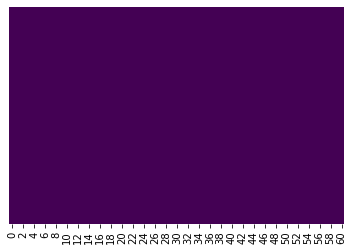

In [302]:
# Check the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Note** : There is No NULL values 

In [303]:
# Lets look out the how much values have rock and mine in target table
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M---> mine and R --> Rock 
-**Note** : It look like balanaced dataset it means it helps get good accuracy rate in fututre model building

In [304]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [305]:
# Lets do one hot encoding for the target value
def convertion(text):
    if 'R' in text:
      return 0
    elif 'M' in text:
      return 1

df[60]= df[60].apply(convertion)

In [306]:
# Separating Data and Labels
X = df.drop(columns=60, axis=1) # Independent data
Y = df[60] # dependent data

In [307]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

**Note** 1 --> Mine and  0 --> rock using one hot encoding techniques 

In [308]:
# Independent data
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [309]:
# Depedent data after encoding 
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [310]:
# Lets import required libraries for feature importances and also fit the dependent and independent data
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [311]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [312]:
print(model.feature_importances_)

[0.0085853  0.00836723 0.00556052 0.01874448 0.0092623  0.00996911
 0.00552664 0.01050424 0.03628512 0.03950508 0.08836557 0.07420324
 0.01712911 0.00914908 0.01252515 0.01520564 0.02652323 0.01049233
 0.00776454 0.02263041 0.0283994  0.0101799  0.0183404  0.00835056
 0.00556236 0.01046705 0.02675653 0.01289631 0.00882112 0.01236075
 0.01677941 0.01146133 0.00826694 0.00800825 0.00694949 0.03315464
 0.02471415 0.00471517 0.00826636 0.00898508 0.01015574 0.01424973
 0.00895306 0.00912114 0.04021298 0.01780104 0.01945734 0.02697731
 0.02831088 0.00576374 0.02255659 0.01791896 0.00943724 0.01428683
 0.00982421 0.00466082 0.00564639 0.00893185 0.00924649 0.00675416]


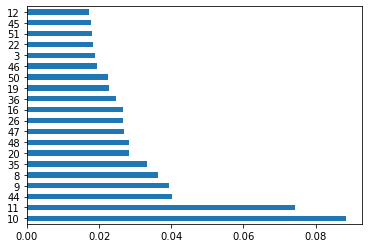

In [313]:
# Top 20 features visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [314]:
corrmat = df.corr()

In [315]:
corrmat.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

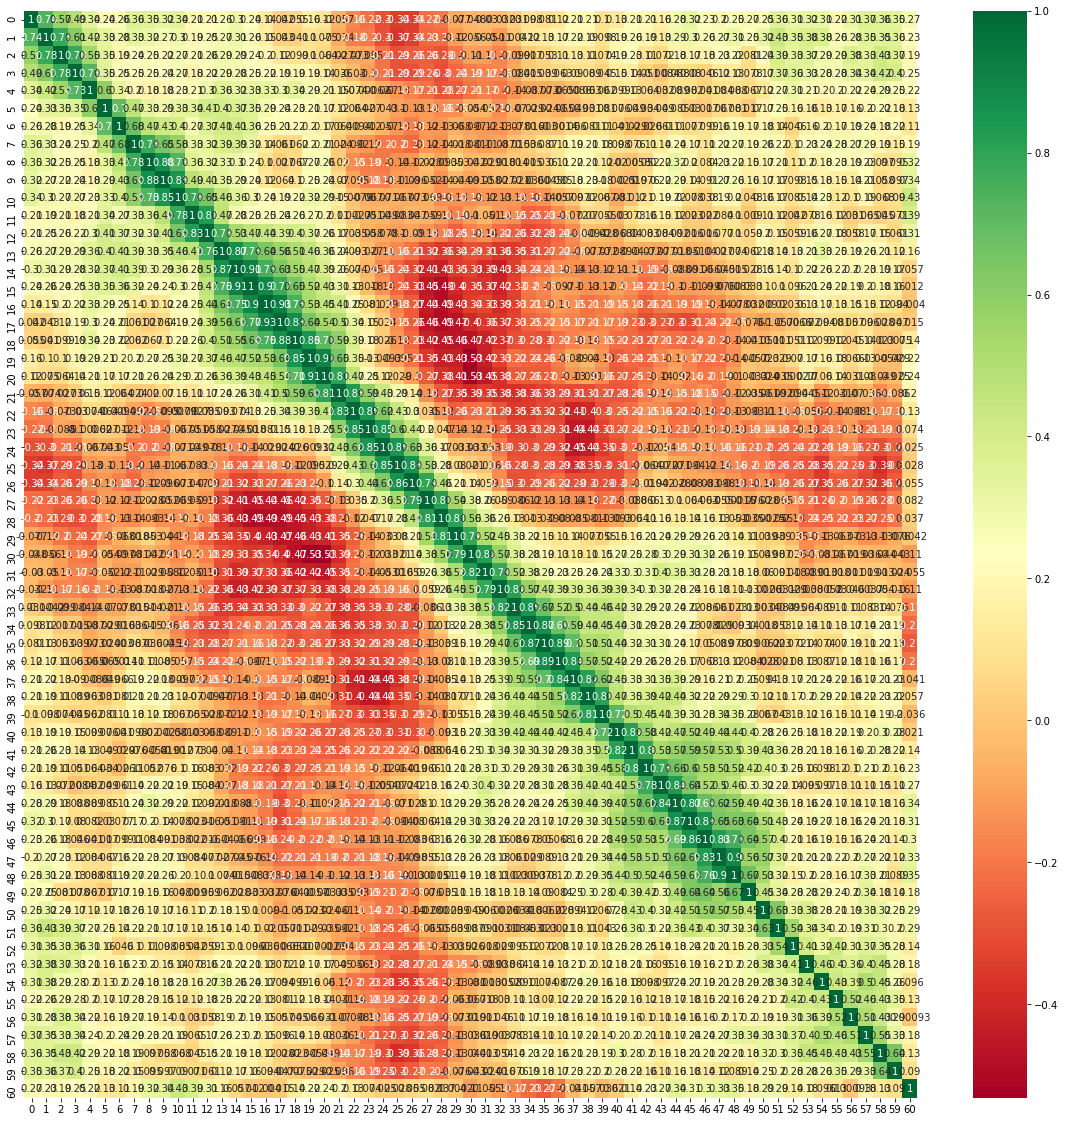

In [316]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [317]:
# Lets split the data  into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [318]:
print(X_train.shape, X_test.shape)

(145, 60) (63, 60)


# Model Evaluation

In [337]:
def models(X_train,Y_train):
    
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    
    from sklearn.neighbors import KNeighborsClassifier
    knn =  KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski',p =2)
    knn.fit(X_train,Y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state= 0)
    svc_lin.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state= 0)
    svc_rbf.fit(X_train,Y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
    tree.fit(X_train,Y_train)
    
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators =10, criterion='entropy',random_state = 0)
    forest.fit(X_train,Y_train)
    
    print("MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY")
    print("")
    print("[0] logistic regression Accuracy             :" ,log.score(X_train,Y_train))
    print("")
    print("[1]  K N N algorithm  Accuracy               :" ,knn.score(X_train,Y_train))
    print("")
    print("[2] Support Vector Machine(svc) Accuracy     :" ,svc_lin.score(X_train,Y_train))
    print("")
    print("[3] Support Vector Machine(rbf)  algorithm   :" ,svc_rbf.score(X_train,Y_train))
    print("")
    print("[4] Naive Bayes Accuracy Accuracy            :" ,gauss.score(X_train,Y_train))
    print("")
    print("[5] Desion Tree Algorithm Accuracy           :" ,tree.score(X_train,Y_train))
    print("")
    print("[6] Random Forest Accuracy                   :" ,forest.score(X_train,Y_train))
    print("")



    
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest



In [338]:
model = models(X_train,Y_train)

MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY

[0] logistic regression Accuracy             : 0.8413793103448276

[1]  K N N algorithm  Accuracy               : 0.8620689655172413

[2] Support Vector Machine(svc) Accuracy     : 0.8689655172413793

[3] Support Vector Machine(rbf)  algorithm   : 0.9103448275862069

[4] Naive Bayes Accuracy Accuracy            : 0.7379310344827587

[5] Desion Tree Algorithm Accuracy           : 1.0

[6] Random Forest Accuracy                   : 1.0



**NOTE**: We applied 6 machine learning algorithms but we got overfitting in two algorithms Decision Tree Algorithm  and  Random Forest  so we did not consider, Support Vector Machine(RBF)  algorithm  gives good accuracy lets use this algorithm the predict 

In [339]:
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_rbf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]!=1):
  print('The object is a Rock')
else:
  print('The object is a mine')


[0]
The object is a Rock


In [340]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_rbf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]!=1):
  print('The object is a Rock')
else:
  print('The object is a mine')


[1]
The object is a mine
